In this notebook I will extract Steph Curry's shot chart data for the 2017-2018 season and plot it using `matplotlib` and `seaborn`. This analysis is largely inspired by Savvas Tjortjoglou's post: [How to Create NBA Shot Charts in Python](http://savvastjortjoglou.com/nba-shot-sharts.html). The first few visualizations follow the process from that post, but after building these basic charts we will improve on them by adding [insert improvements here]

In [4]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Web Scraping

We can access the API that the NBA uses for [stats.nba.com](http://stats.nba.com/) using the `requests` library.

To scrape Steph Curry's shot chart data we will use the following [url](https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=201939&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID=):

In [5]:
# Grab URL for scraping Steph Curry's shot chart data
shot_chart_url = ('https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18'
                  '&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division='
                  '&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode'
                  '=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome='
                  '&PORound=0&Period=0&PlayerID=201939&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5='
                  '&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment='
                  '&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0'
                  '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5='
                  '&VsTeamID=')
shot_chart_url_2 = ('https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=201939&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID=')
# headers are necessary in the requests.get call to simulate an actual web browser
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

This url accesses the JSON file that contains the data that we want. There are several API parameters located within the url. For example, the PlayerID parameter in the url is equal to 201939, which is Steph Curry's PlayerID.

We will use the get method of `requests` to get the data we want:

In [6]:
# Get the webpage containing the data
response = requests.get(shot_chart_url, headers = headers)
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

Create a pandas `DataFrame` using the scraped shot chart data.

In [7]:
shots_df = pd.DataFrame(shots, columns=headers)

# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shots_df.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700002,56,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,9,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,95,242,1,1,20171017,GSW,HOU
1,Shot Chart Detail,0021700002,167,201939,Stephen Curry,1610612744,Golden State Warriors,1,0,32,Missed Shot,Turnaround Fadeaway shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,13,129,43,1,0,20171017,GSW,HOU
2,Shot Chart Detail,0021700002,207,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,14,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,10,1,0,20171017,GSW,HOU
3,Shot Chart Detail,0021700002,219,201939,Stephen Curry,1610612744,Golden State Warriors,2,8,15,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-127,239,1,0,20171017,GSW,HOU
4,Shot Chart Detail,0021700002,370,201939,Stephen Curry,1610612744,Golden State Warriors,3,11,13,Made Shot,Driving Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-13,14,1,1,20171017,GSW,HOU


The above shot chart data contains all the field goal attempts Steph Curry took during the 2017-2018 regular season. We want the data found in columns LOC_X and LOC_Y. These values refer to coordinates for each shot attempt, which can be plotted onto a set of axes that represent the basketball court.

# Plotting the Shot Chart Data

Let's plot the shot chart data to see how it looks on an axes graph:

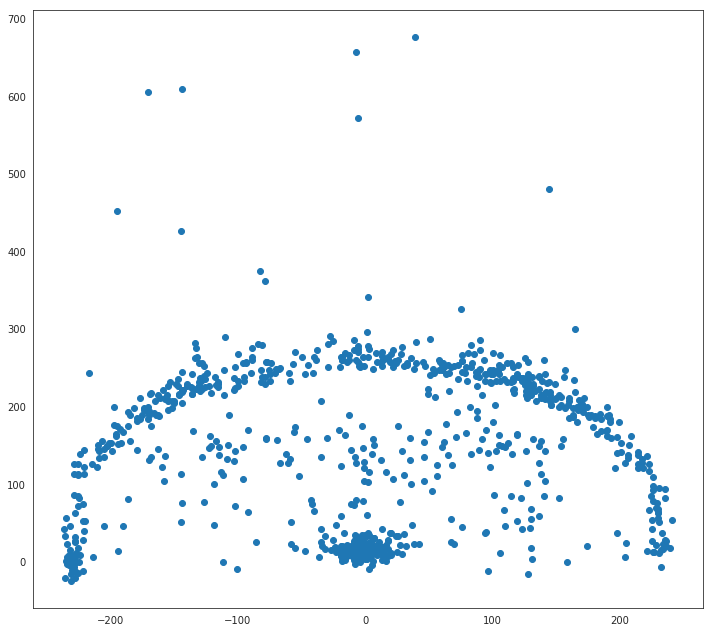

In [8]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shots_df.LOC_X, shots_df.LOC_Y)
plt.show()

The x-axis values are the inverse of what they should be because if the hoop is at y=0, x=0, the shots on the right side of the court (players' perspective) should actually be on the left (our perspective). This is exemplified below in plotting the shots on the right side of the courts (players' perspective).

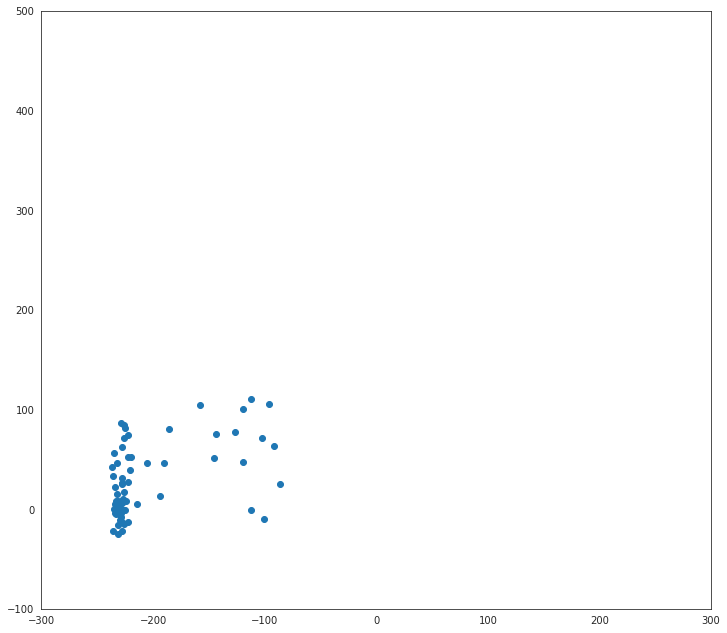

In [9]:
right = shots_df[shots_df.SHOT_ZONE_AREA == 'Left Side(L)']
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300, 300)
plt.ylim(-100,500)
plt.show()

The shots from area "Left Side(L)" are actually on the right side of the hoop. We will need to keep this in mind when creating the final shot chart.

# Drawing the Court

By looking at the first plot and at the data we can roughly estimate that the center of the hoop is at the origin. We can also estimate that every 10 units on either the x and y axes represent one foot. We can verify this by looking at the first observation in our `DataFrame`. That shot was taken from the Right Side Center(RC) spot from a distance of 25 ft with a LOC_Y value of 242. So the shot was taken from at least 24.2 ft in the Y direction, meaning the remaining distance to reach 25 ft is the offset from the x coordinate.

The dimensions of a basketball court can be found [here](http://www.sportscourtdimensions.com/wp-content/uploads/2015/02/nba_court_dimensions_h.png).

Using these dimensions we can convert them to fit the scale of opur plot and draw them using [Matplotlib Patches](http://matplotlib.org/api/patches_api.html). Specifically, we will be using [Circle](http://matplotlib.org/api/patches_api.html#matplotlib.patches.Circle), [Rectangle](http://matplotlib.org/api/patches_api.html#matplotlib.patches.Rectangle), and [Arc](http://matplotlib.org/api/patches_api.html#matplotlib.patches.Arc) objects to draw our court.

In [10]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    """ (None) -> None

    Draw a basketball court on an matplotlib figure.
    """
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court
    
    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system (9in / 12ft = .75; .75*10ft = 7.5ft)
    hoop = plt.Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
# The paint
    # Create the outer box of the paint (width=16ft, height=19ft)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
# Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    
    if outer_lines:
        # Draw the half court line, baseline, and side outbound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax

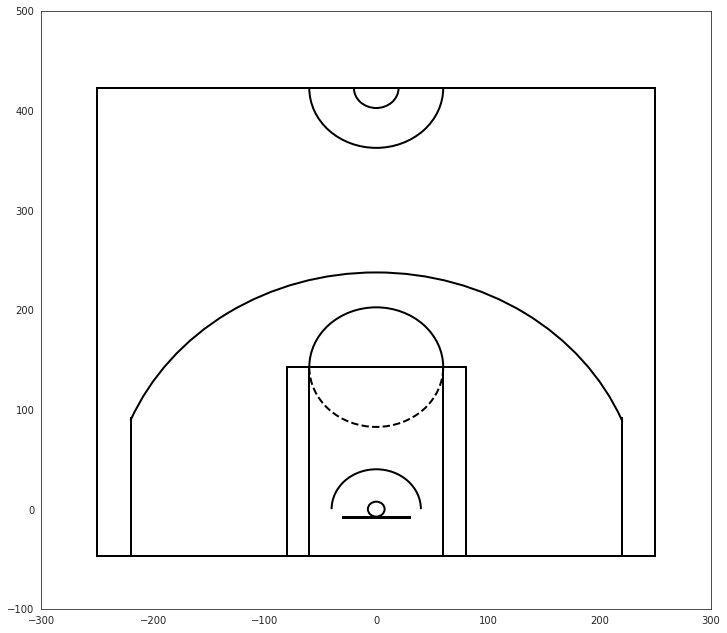

In [11]:
# Draw the court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

# Creating Shot Charts

Now that we have the template for our basketball court, we want to plot the shot chart data. In order to adjust the x-values properly, we will pass in the negative inverse of LOC_X to `plt.scatter`.

Note: You can also pass in descending values for the x-axis (300, -300) to plt.xlim to keep LOC_X positive

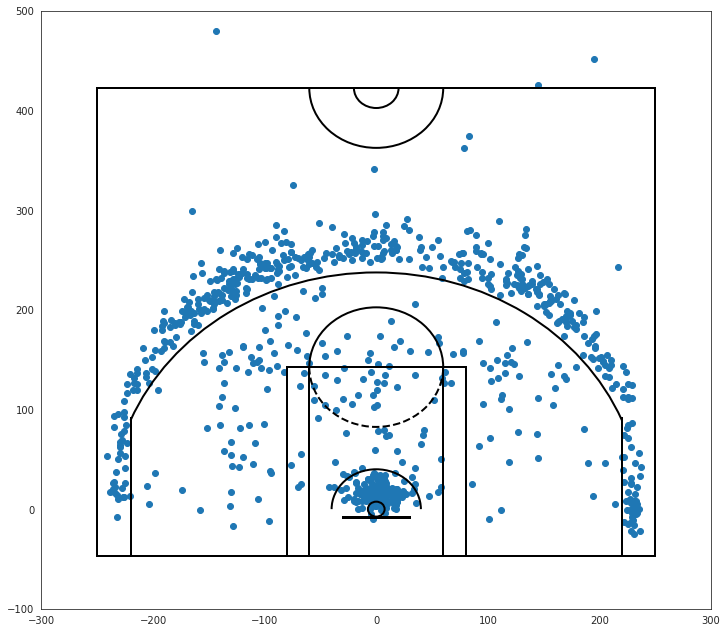

In [12]:
# Draw the court with Curry's shot attempts plotted in
plt.figure(figsize=(12,11))
plt.scatter(-shots_df.LOC_X, shots_df.LOC_Y)
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

We can orient our shot chart to position the hoop at the top of the chart, which is the orientation that shot charts on [stats.nba.com](http://stats.nba.com/) use. We do this by descending y-values from the bottom to the top of the y-axis. When we do this we no longer need to adjust the x-values of our plot.

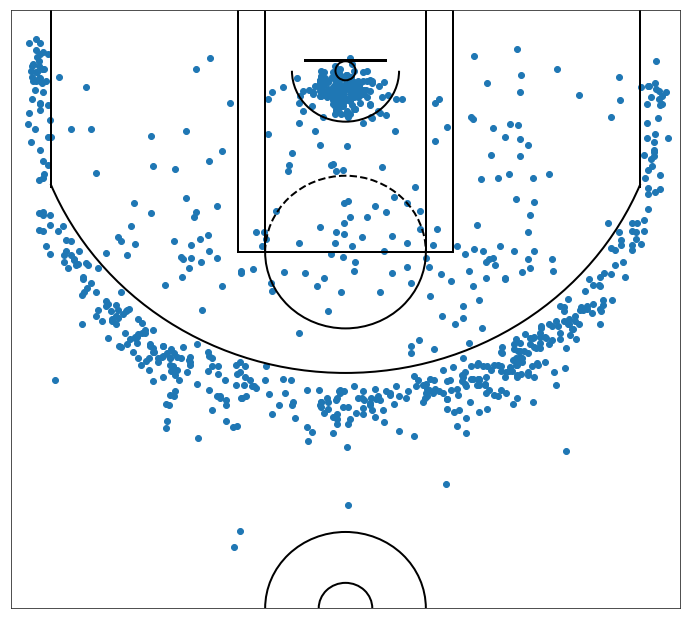

In [13]:
# Draw the court with Curry's shot attempts plotted in
plt.figure(figsize=(12,11))
plt.scatter(shots_df.LOC_X, shots_df.LOC_Y)
draw_court()
# Adjust plot limits to fit only half court
plt.xlim(-250,250)
# Descending values along the y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5,-47.5)
# Get rid of axis tick labels
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

Let's create a few shot charts using jointplot and seaborn.

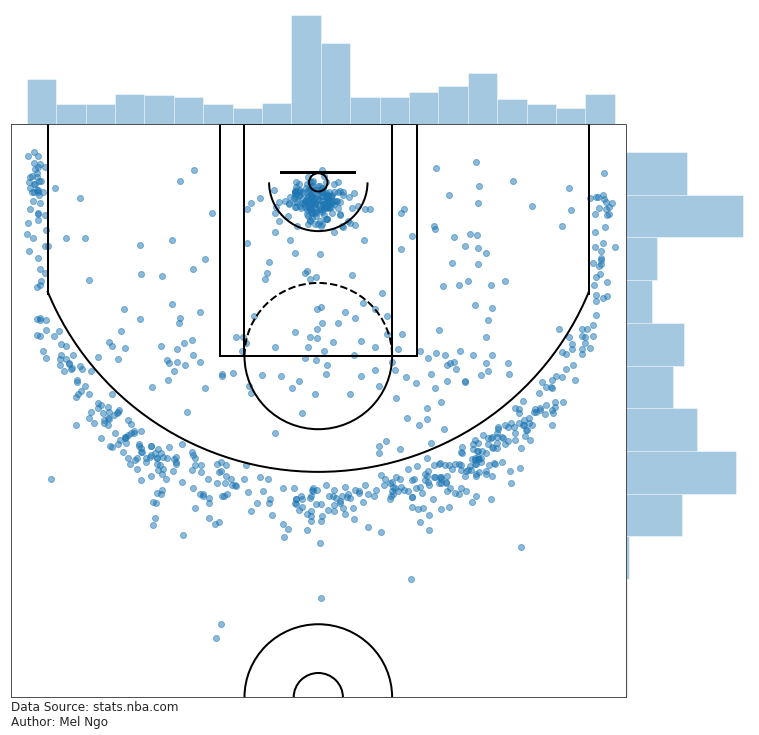

In [14]:
# Create jointplot
joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y,
                                kind='scatter', space=0, alpha=0.5, marginal_kws=dict(bins=20, rug=False))

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Steph Curry FGA \n2017-2018 Reg. Season',
            y=1.2, fontsize=18)

# Add data source and author
ax.text(-250,445,'Data Source: stats.nba.com'
       '\nAuthor: Mel Ngo', fontsize=12)

plt.show()


# Getting a Player's Image

Let's also scrape Steph Curry's picture from [stats.nba.com](stats.nba.com) and place it on our plot. We can find his image at [this url](https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612744/2018/260x190/201939.png).

To retrieve the image for our plot we can use `urlretrieve` from `url.requests` as follows:

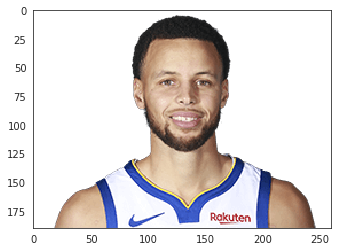

In [15]:
import urllib.request
# Pass in the link to the image as the first argument
# The 2nd argument tells urlretrieve what we want to scrape
pic = urllib.request.urlretrieve("https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/1610612744/2018/260x190/201939.png", "201939.png")

# urlretrieve returns a tuple with our image as the first element and imread
# reads in the image as a multidimensional numpy array so matplotlib can plot it
curry_pic = plt.imread(pic[0])

# Plot the image
plt.imshow(curry_pic)
plt.show()

Now to plot Curry's face on a `jointplot` we will import `OffsetImage` from `matplotlib.Offset`, which will allow us to place the image at the top right corner of the plot. So let's create our shot chart like we did above, but this time we will create a KDE `jointplot` and at the end add on our image.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


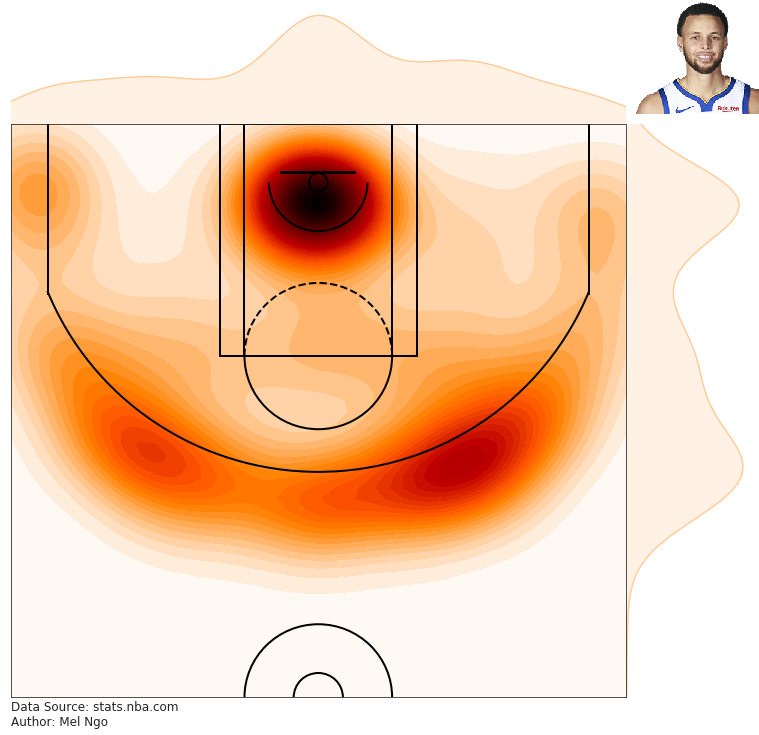

In [16]:
from matplotlib.offsetbox import OffsetImage

# Create jointplot

# get colormap for the main kde plot
# Note we can extract a color from cmap to use for
# the plots that lie on the side and top axes
cmap = plt.cm.gist_heat_r

# n_levels sets the number of contour lines for the main kde plot
joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y, kind='kde',
                                space=0, color=cmap(0.1),
                                cmap=cmap, n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Steph Curry FGA \n2017-2018 Reg. Season',
            y=1.2, fontsize=18)

# Add data source and author
ax.text(-250,445,'Data Source: stats.nba.com'
       '\nAuthor: Mel Ngo', fontsize=12)

# Add Curry's image to the top right
# First create OffsetImage by passing the image and set the zoom level
# to make the image small enough to fit on our plot
img = OffsetImage(curry_pic, zoom=0.6)

# Pass in a tuple of x,y coordinates to set_offset to place the plot
# somewhere, play around with the values until you find a spot
# where you want the image to be
img.set_offset((625,621))

# Add the image
ax.add_artist(img)

plt.show()

Another `jointplot` but with hexbins.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


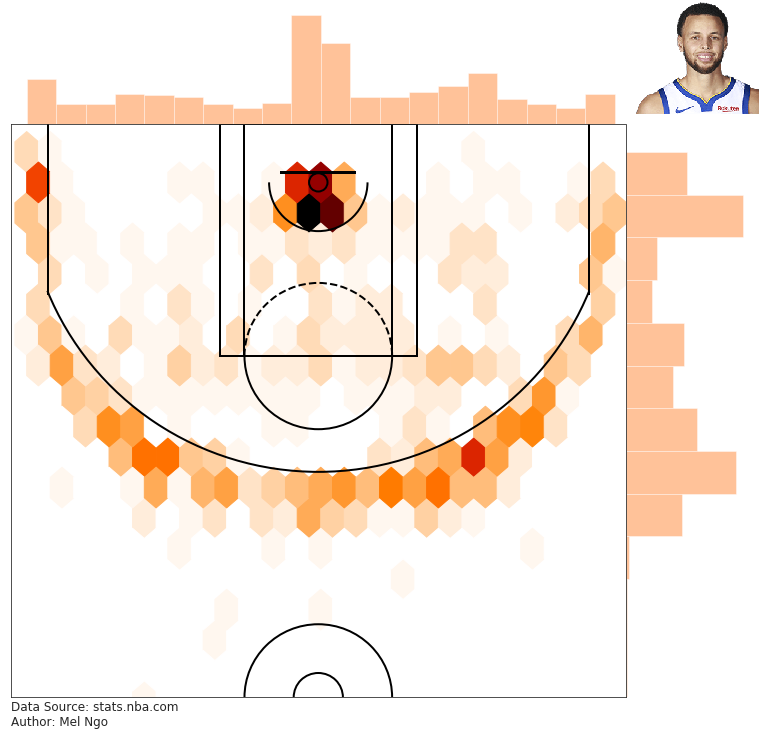

In [17]:
from matplotlib.offsetbox import OffsetImage

# Create jointplot

# Set colormap
cmap = plt.cm.gist_heat_r

joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y, kind='hex',
                                space=0, color=cmap(0.3), cmap=cmap,
                                joint_kws=dict(gridsize=25), marginal_kws=dict(bins=20))

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250, 250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Steph Curry FGA \n2017-2018 Reg. Season',
            y=1.2, fontsize=18)

# Add data source and author
ax.text(-250,445,'Data Source: stats.nba.com'
       '\nAuthor: Mel Ngo', fontsize=12)

# Add Curry's image to the top right
img = OffsetImage(curry_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)

plt.show()